In [1]:
# We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

# here mpg == dependent variable             rest of mpg columns == independent variables

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
cdata = pd.read_csv('auto-mpg.csv')

In [4]:
cdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


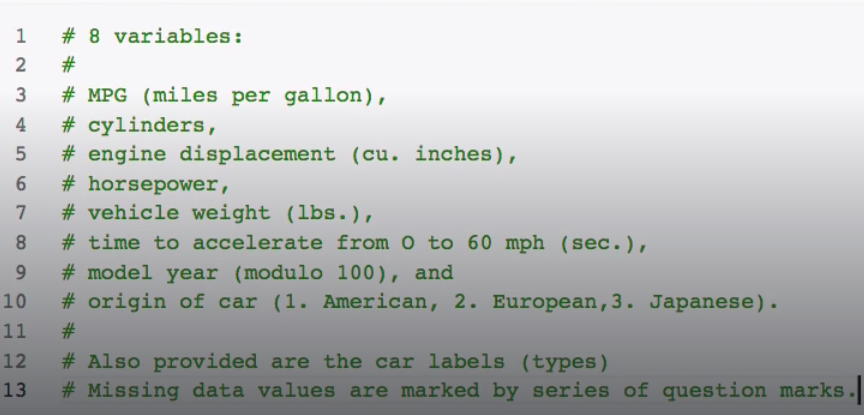

In [5]:
# let me clear this our    target variable( dependent variable) is mpg        & all other values are predictive variables

In [6]:
cdata.shape

(398, 9)

In [7]:
# if you see in dataframe a column name 'origin' is present & we human can understand 1 is america  but machine won't
# so let us create meaning full terms

cdata['origin'] = cdata['origin'].replace({1:'america',2:'europe',3:'japan'})

In [8]:
cdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger


In [9]:
# droping unneccesary column
cdata = cdata.drop('car name',axis=1)

In [10]:
cdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


#### Dealing with missing values

In [11]:
cdata.isnull().sum()             # good we do not have any nan value we are good to go

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

#### dealing with data types

In [12]:
# check if all data types of columns are right

cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [13]:
# in data set  horsepower  is int but python think it as    object so try to fix it

# for this first let us check where is our not int values are in the column

is_int = pd.DataFrame(cdata.horsepower.str.isdigit())      #   .str.isdigit() help us to fish the wrong items

In [14]:
cdata[is_int['horsepower' ]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [15]:
# when creating dataframe in industrial level if you do not have any data  then you use ?    but here we need to remove it

In [16]:
cdata = cdata.replace('?',np.nan)

In [17]:
cdata[is_int['horsepower' ]==False]       # succesfully we removed ?    with nan

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [18]:
cdata.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [94]:
# now let us try to remove these null values
# replacing nan with median value
cdata.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_europe        0.0
origin_japan         0.0
dtype: float64

In [20]:
cdata= cdata.replace(np.nan,93.5)              # or you can use

In [21]:
cdata['horsepower'] = cdata['horsepower'].fillna((cdata['horsepower'].median()))          # both work fine for us

In [22]:
cdata.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [23]:
# finally check for data types
cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [24]:
# horese power is still object                  &   we know that it has all integers in it so convert it from object to int

cdata['horsepower'] = cdata['horsepower'].astype('float')

In [25]:
cdata.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [26]:
# origin
#      first it is in integer than we converted it into string        but now we need to change it to categorial values
# try to give separate column for individual origin

cdata = pd.get_dummies(cdata,['origin'])

In [27]:
cdata                                                               

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


## Bivariate (Pairplot)

In [28]:
cdata_att = cdata.iloc[:,0:7]

In [29]:
cdata_att

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


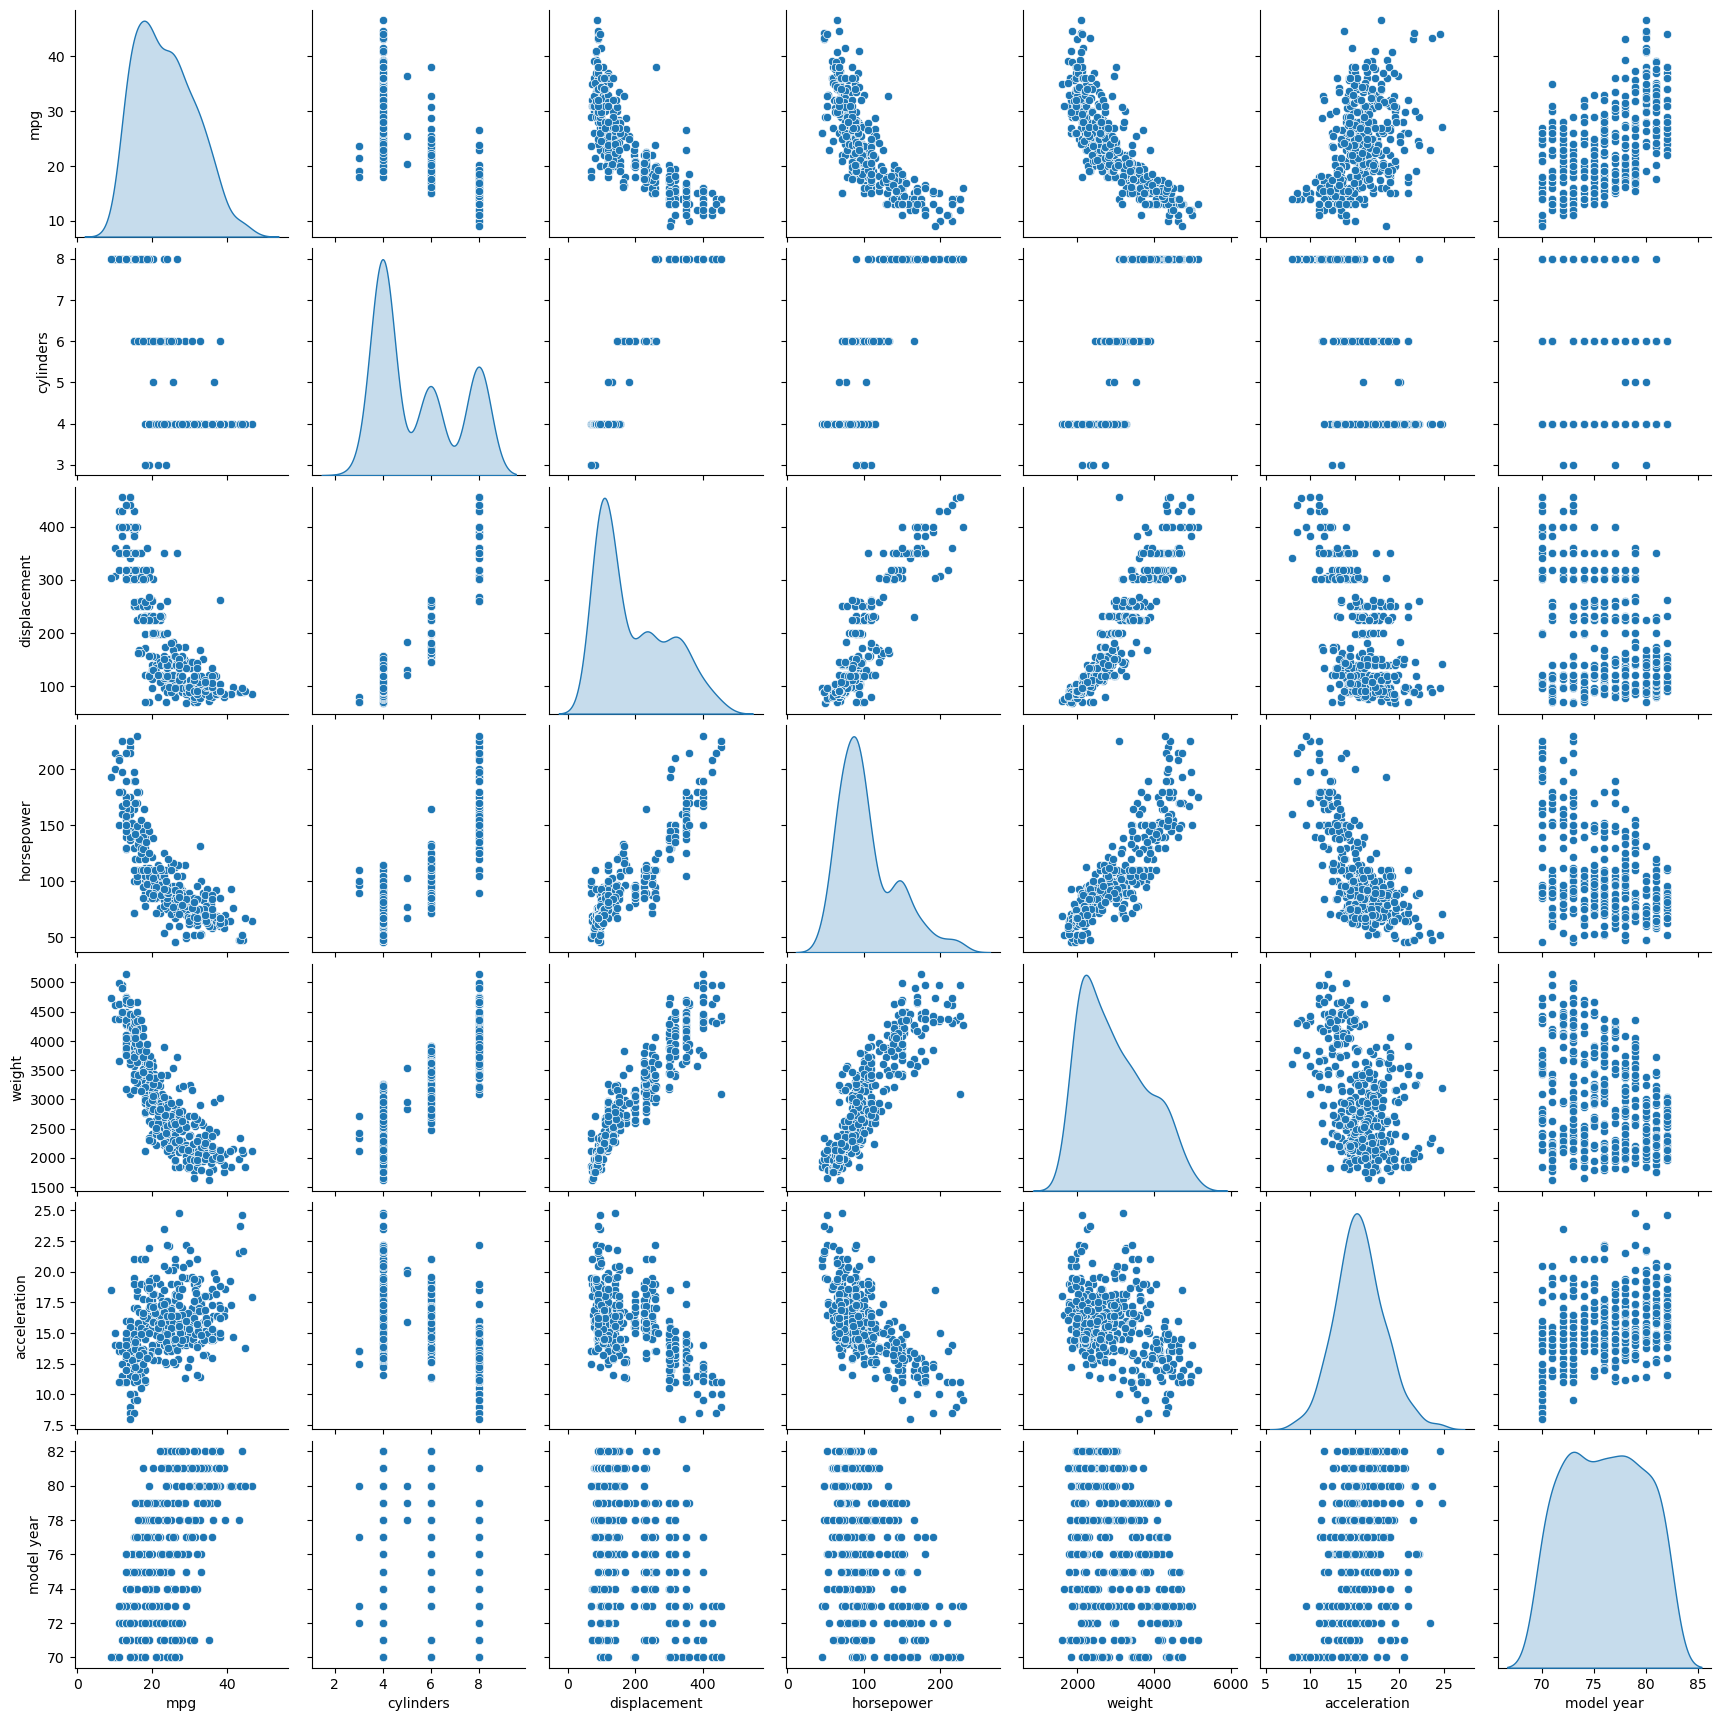

In [30]:
sns.pairplot(cdata_att,diag_kind='kde')

In [31]:
# now let us take care of dependent(y) & indipendent varaibles(x)

y = cdata['mpg']
X = cdata.drop('mpg',axis=1)

In [32]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [33]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [34]:
# now let us split our data into trainig & testing

In [35]:
X_train , X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
350,4,105.0,63.0,2215,14.9,81,1,0,0
59,4,97.0,54.0,2254,23.5,72,0,1,0
120,4,121.0,112.0,2868,15.5,73,0,1,0
12,8,400.0,150.0,3761,9.5,70,1,0,0
349,4,91.0,68.0,1985,16.0,81,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
255,4,140.0,88.0,2720,15.4,78,1,0,0
72,8,304.0,150.0,3892,12.5,72,1,0,0
235,4,97.0,75.0,2265,18.2,77,0,0,1


In [37]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
174,6,171.0,97.0,2984,14.5,75,1,0,0
359,4,141.0,80.0,3230,20.4,81,0,1,0
250,8,318.0,140.0,3735,13.2,78,1,0,0
274,5,131.0,103.0,2830,15.9,78,0,1,0
283,6,232.0,90.0,3265,18.2,79,1,0,0
...,...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,0,1
39,8,400.0,175.0,4464,11.5,71,1,0,0
171,4,134.0,96.0,2702,13.5,75,0,0,1
271,4,156.0,105.0,2745,16.7,78,1,0,0


In [38]:
 y_train

350    34.7
59     23.0
120    19.0
12     15.0
349    34.1
       ... 
393    27.0
255    25.1
72     15.0
235    26.0
37     18.0
Name: mpg, Length: 278, dtype: float64

In [39]:
 y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
382    34.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

In [40]:
len( y_test)

120

## Fit a Linear Model

In [41]:
regression_model = LinearRegression()

In [42]:
regression_model.fit(X_train,y_train)                   # a model is successfully created

LinearRegression()

In [43]:
# here we have generalised equation as    y = mx1 +mx2 +mx3 ........+c    (different m means   different columns of data)

In [44]:
# to gain all m values use
regression_model.coef_
                       # -0.39480797   for  cylinders column           0.02894551    for   displacement  column  & so on

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -1.79884935,  1.20243366,  0.59641569])

In [45]:
# elobarating
for inde,col_name in enumerate(X_train.columns):
    print('the coefficient (or) m value for {} is {}' . format(col_name,regression_model.coef_[inde]))

the coefficient (or) m value for cylinders is -0.3948079661648298
the coefficient (or) m value for displacement is 0.028945510765487476
the coefficient (or) m value for horsepower is -0.021752207723547266
the coefficient (or) m value for weight is -0.007352032065147354
the coefficient (or) m value for acceleration is 0.06191936600761707
the coefficient (or) m value for model year is 0.8369338917645021
the coefficient (or) m value for origin_america is -1.7988493458374286
the coefficient (or) m value for origin_europe is 1.2024336550810846
the coefficient (or) m value for origin_japan is 0.5964156907563449


In [46]:
# now find the value of     c
regression_model.intercept_

-19.48588477145331

In [47]:
# now from generalised equation   our  LR formula looks like
#       mpg  =  (-0.394 * cylinders) + (0.028 * displacement) + ..... + c

In [48]:
# now let us make some predictions
regression_model.predict(X_test)



array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34

In [49]:
# you get many predicted values let me elobarate first one so you can understand

# 20.91 ==  (6* -0.39480)+ (171*0.028)+(97*-0.0217522)+(2984* -0.007352)+(14.5* 0.0619)+(75*0.83693)  +(1*-1.79884)     

In [50]:
(6* -0.39480)+ (171*0.028)+(97*-0.0217522)+(2984* -0.007352)+(14.5* 0.0619)+(75*0.83693)  +(1*-1.79884)     

40.23932859999999

In [51]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
174,6,171.0,97.0,2984,14.5,75,1,0,0
359,4,141.0,80.0,3230,20.4,81,0,1,0
250,8,318.0,140.0,3735,13.2,78,1,0,0
274,5,131.0,103.0,2830,15.9,78,0,1,0
283,6,232.0,90.0,3265,18.2,79,1,0,0
...,...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,0,1
39,8,400.0,175.0,4464,11.5,71,1,0,0
171,4,134.0,96.0,2702,13.5,75,0,0,1
271,4,156.0,105.0,2745,16.7,78,1,0,0


In [52]:
regression_model.predict(np.array([6,171,97,2984,14.5,75,1,0,0]).reshape(1,-1))

C:\Users\TURBO2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.91554528])

In [53]:
# let us check how good is our model is performing

regression_model.score(X_test,y_test)       # not bad 

0.8433135132808829

In [54]:
# let us check for errors

from sklearn import metrics

predic = regression_model.predict(X_test)

In [55]:
metrics.mean_absolute_error(y_test,predic)

2.3542812072204016

In [56]:
mae = metrics.mean_absolute_error(y_test,predic)

In [57]:
rmse = np.sqrt(mae)

In [58]:
rmse

1.5343667121064644

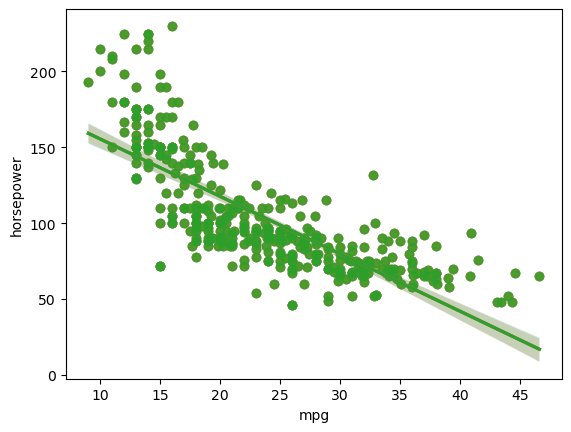

In [61]:
sns.regplot(x= 'mpg',y='horsepower',data=cdata_att)
plt.show()

In [62]:
cdata_att

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


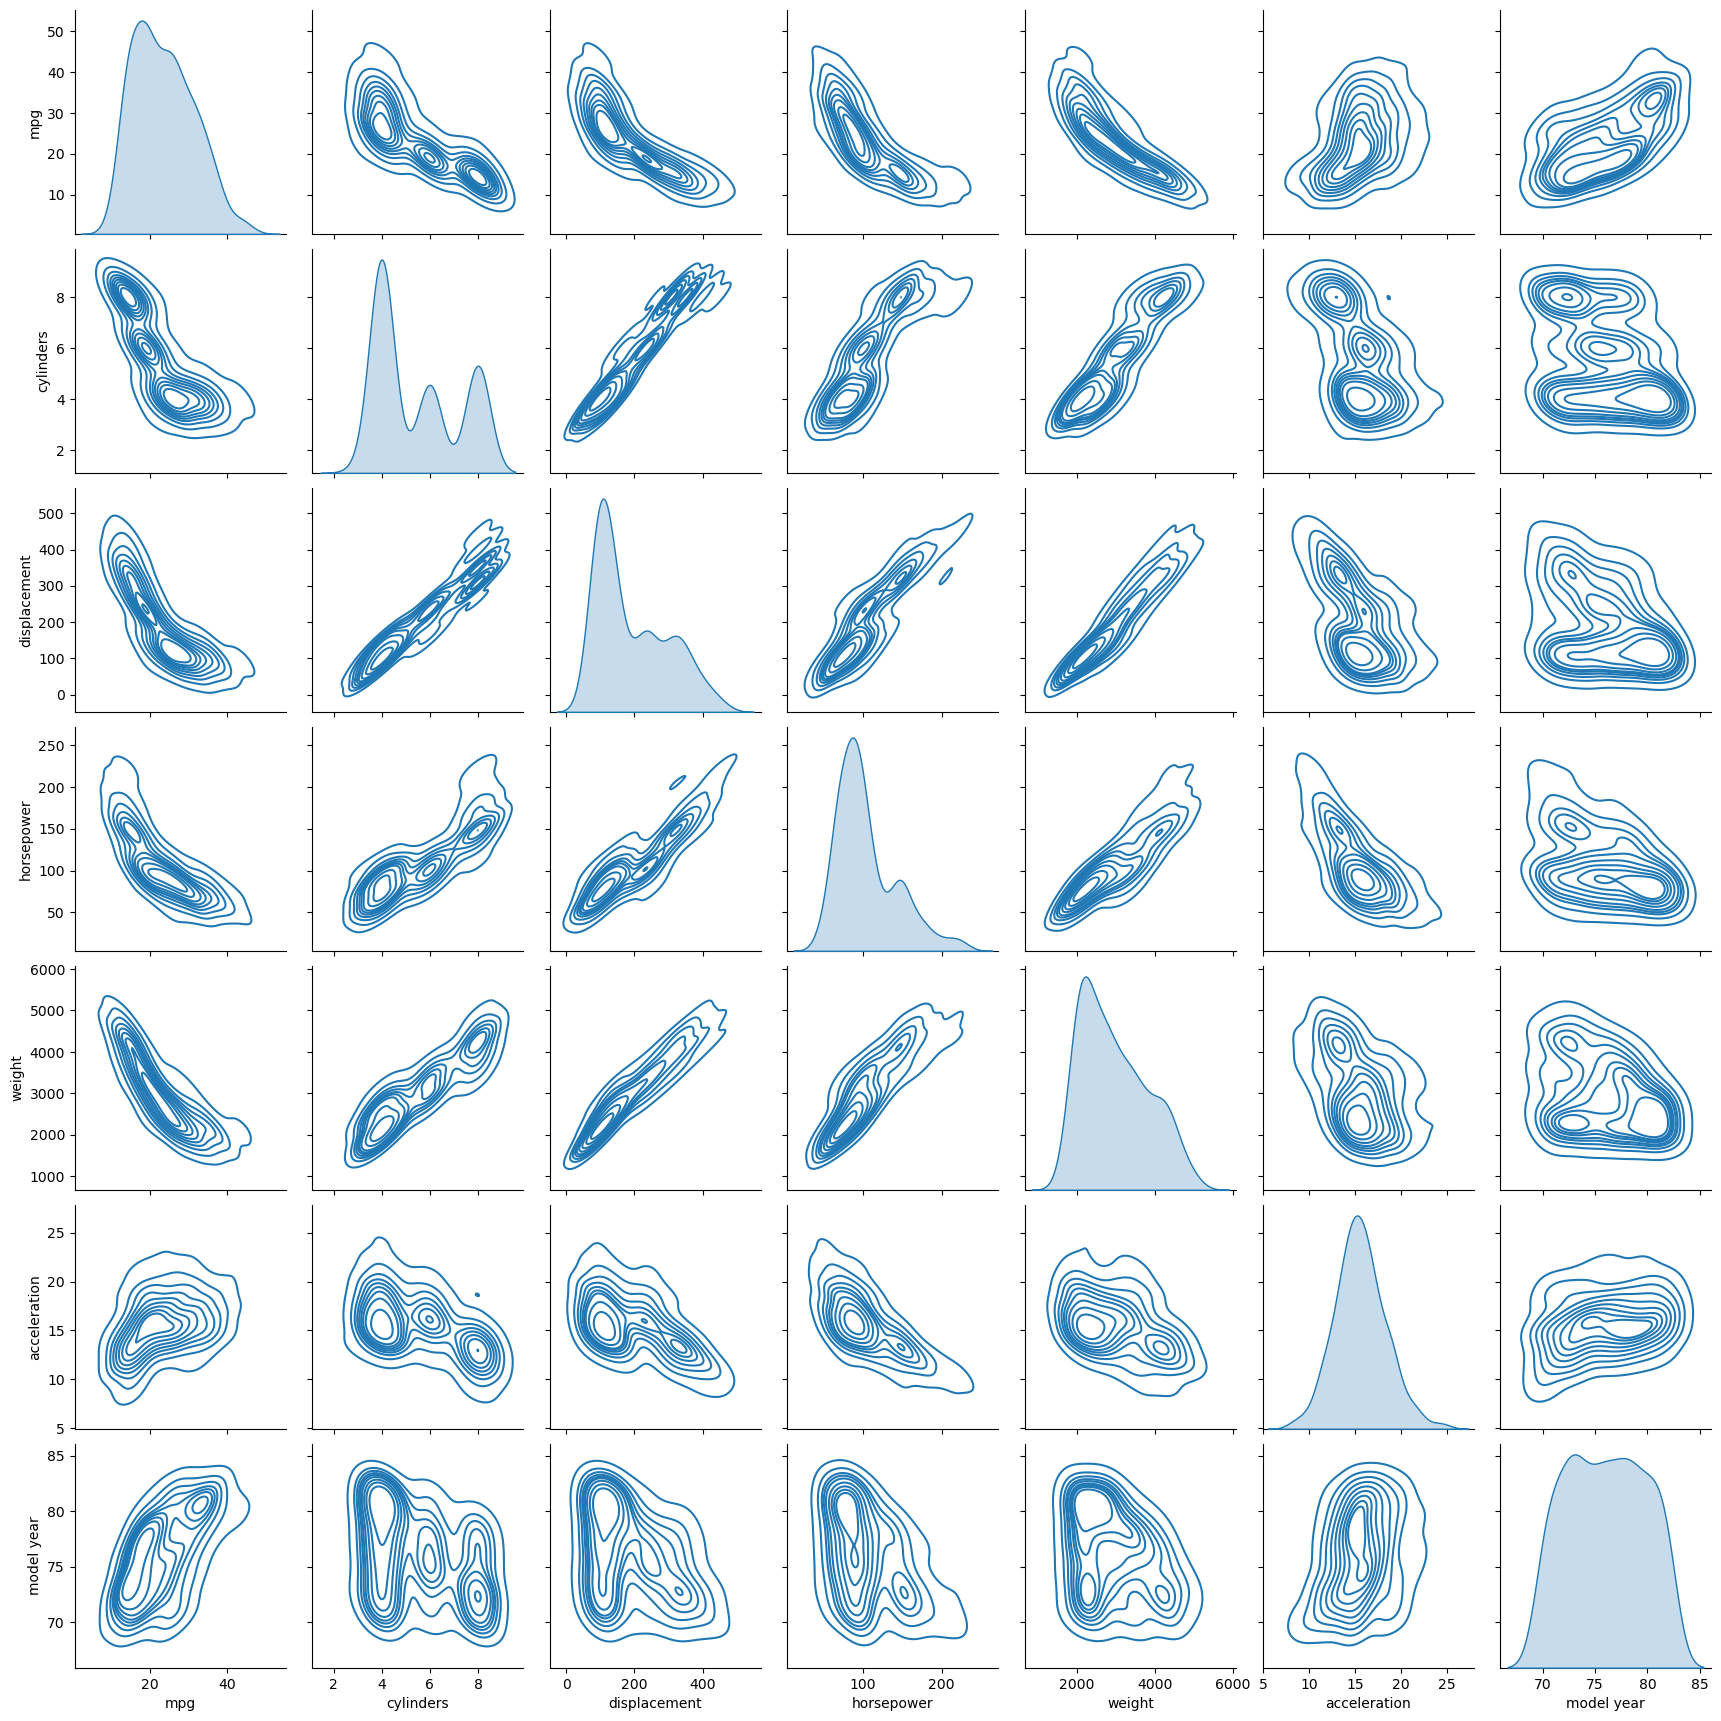

In [92]:
s= sns.pairplot(data=cdata_att,kind='kde')
plt.show()

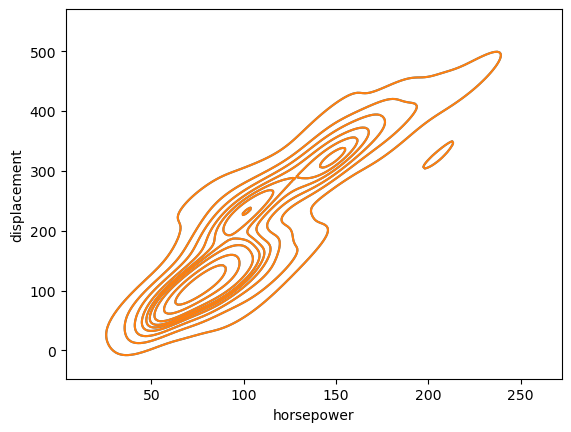

In [76]:
sns.kdeplot(x= 'horsepower',y ='displacement',data=cdata_att)
plt.show()

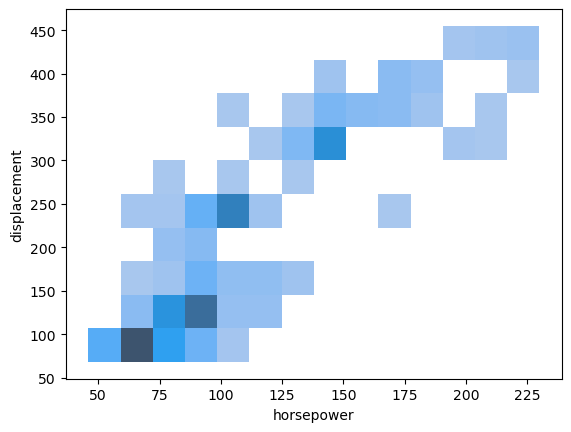

In [77]:
sns.histplot(x= 'horsepower',y ='displacement',data=cdata_att)
plt.show()

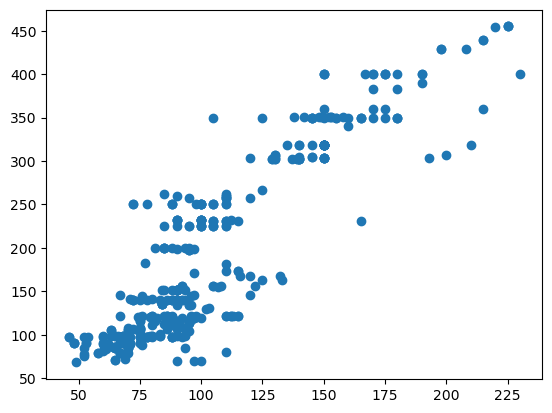

In [82]:
plt.scatter(x= 'horsepower',y ='displacement',data=cdata_att)
plt.show()

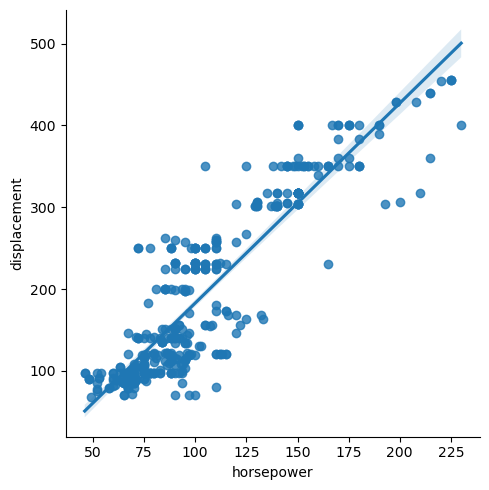

In [83]:
sns.lmplot(x= 'horsepower',y ='displacement',data=cdata_att)
plt.show()

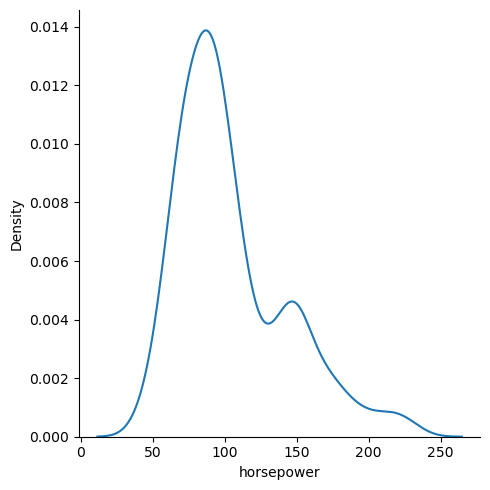

In [90]:
sns.displot(cdata['horsepower'],kind='kde')
plt.show()

In [93]:
# ok lab 2 is finished